<a href="https://colab.research.google.com/github/filnels/Homeworks/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# импортируем TensorFlow и набор данных TensorFlow
import tensorflow as tf
import tensorflow_datasets as tfds

# вспомогательные библиотеки
import math
import numpy as np
import matplotlib.pyplot as plt

# Улучшим отображение прогрессбара
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

# Устанавливаем уровень логирования
tf.get_logger().setLevel('ERROR')


2.17.0


In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
class_names = ['Футболка / топ', "Шорты", "Свитер", "Платье",
              "Плащ", "Сандали", "Рубашка", "Кроссовок", "Сумка",
              "Ботинок"]

In [ ]:
#посмотрим сколько у нас в тренировочном и тестовом наборах

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Количество тренировочных экземпляров: {}'.format(num_train_examples))
print('Количество тестовых экземпляров: {}'.format(num_test_examples))

Количество тренировочных экземпляров: 60000
Количество тестовых экземпляров: 10000


In [ ]:
#Предобработка данных, нормализуем данные

In [ ]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [ ]:
#Изучим обработанные данные,  отрисуем изображение:

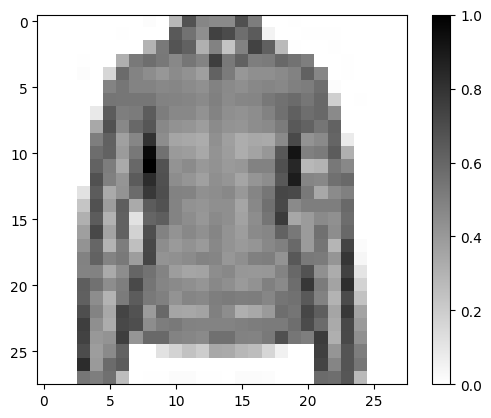

In [ ]:
# Берём единственное изображение и удаляем из него цветовую составляющую # посредством метода reshape()
for image, label in test_dataset.take(1):
  break;
image = image.numpy().reshape((28, 28))

# отрисовываем изображение
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Отобразим первые 25 изображений из тренировочного набора данных и под каждым изображением укажем к какому классу оно относится.

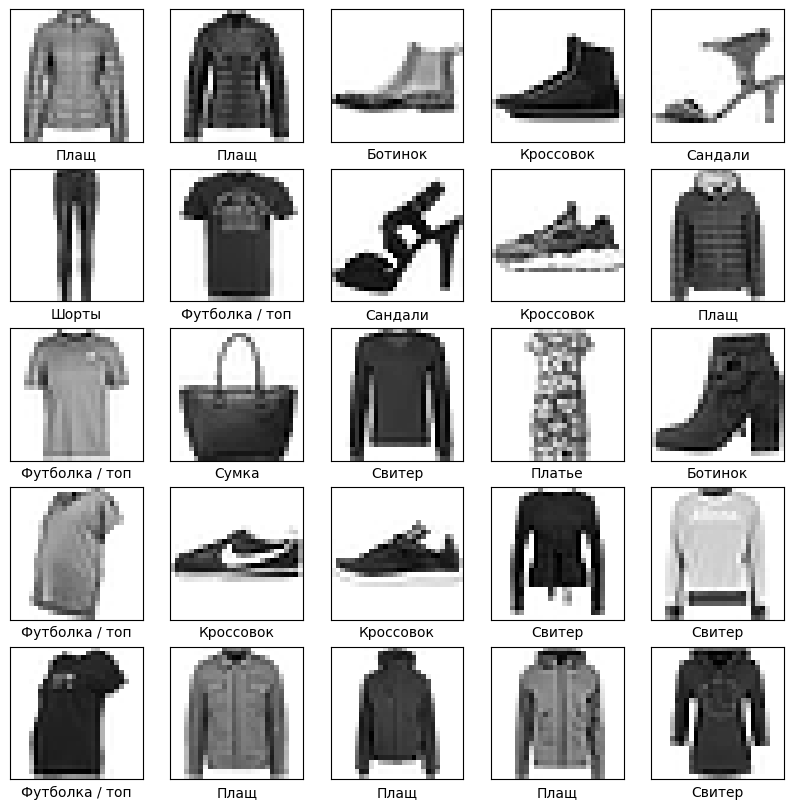

In [ ]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1
plt.show()

In [ ]:
#Настраиваем слои

In [ ]:
#model = tf.keras.Sequential([
 #   tf.keras.layers.Flatten(input_shape=(28, 28, 1)),

    # Первый скрытый слой с 256 нейронами
   # tf.keras.layers.Dense(256, activation=tf.nn.relu),

    # Второй скрытый слой с 128 нейронами
   # tf.keras.layers.Dense(128, activation=tf.nn.relu),

    # Третий скрытый слой с 64 нейронами
    #tf.keras.layers.Dense(64, activation=tf.nn.relu),

    # Выходной слой с 10 нейронами для 10 классов одежды
   # tf.keras.layers.Dense(10, activation=tf.nn.softmax)
#])


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(228, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
#Компилируем модель, настраиваем гиперпаармтры

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE) # перемешивает все изображения для того, чтобы на обучение нашей модели не влиял порядок подачи входных данных.
test_dataset = test_dataset.batch(BATCH_SIZE) # сообщает методу тренировки model.fit использовать блоки по 32 изображения и метки при обновлении внутренних переменных модели.

In [ ]:
#Тренировка модели

In [ ]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7882 - loss: 0.6000
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8666 - loss: 0.3704
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8808 - loss: 0.3292
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8913 - loss: 0.3007
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8929 - loss: 0.2947


In [ ]:
# Проверим точность на тестовых данных

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))
print("Точность на тестовом наборе данных: ", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8758 - loss: 0.3515
Точность на тестовом наборе данных:  0.8738999962806702


In [ ]:
# точность на тестовом наборе данных оказалась меньше точности на тренировочном наборе данных.

In [ ]:
# воспользоваться обученной моделью для получения предсказаний по некоторым изображениям

In [ ]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([3.2146763e-05, 8.9023445e-07, 3.0834768e-02, 9.4989136e-06,
       9.3055332e-01, 1.7466075e-09, 3.8567640e-02, 6.9974928e-09,
       1.6117926e-06, 3.6161814e-09], dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
#Это значит, что модель проявила наибольшую уверенность в том, что это изображение относится к классу с меткой 4 (class_names[4]).
# проверим, что результат соответствует действительности:

In [ ]:
test_labels[0]

4

In [ ]:
#отобразим все входные изображения и соответствующие предсказания модели по 10 классам:

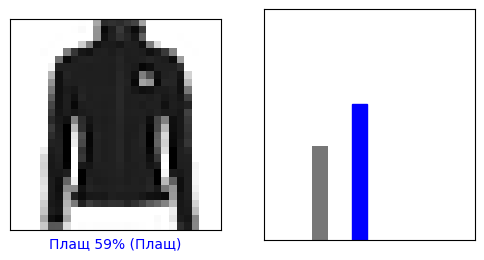

In [ ]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_labels):
    predictions_array, true_label = predictions_array[i], true_labels[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Пример
i = 29
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)


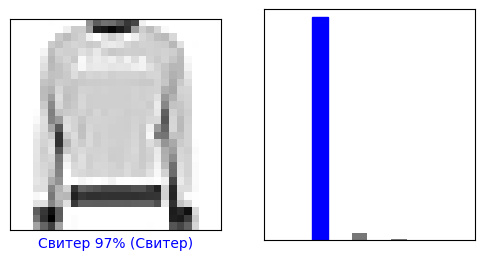

In [ ]:
i = 19
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

In [ ]:
#отобразим несколько изображений с их соответствующими предсказаниями.
#Корректные предсказания — синие, неверные — красным. Значение под изображением отражает процент уверенности модели в том,
# что входное изображение соответствует этому классу.

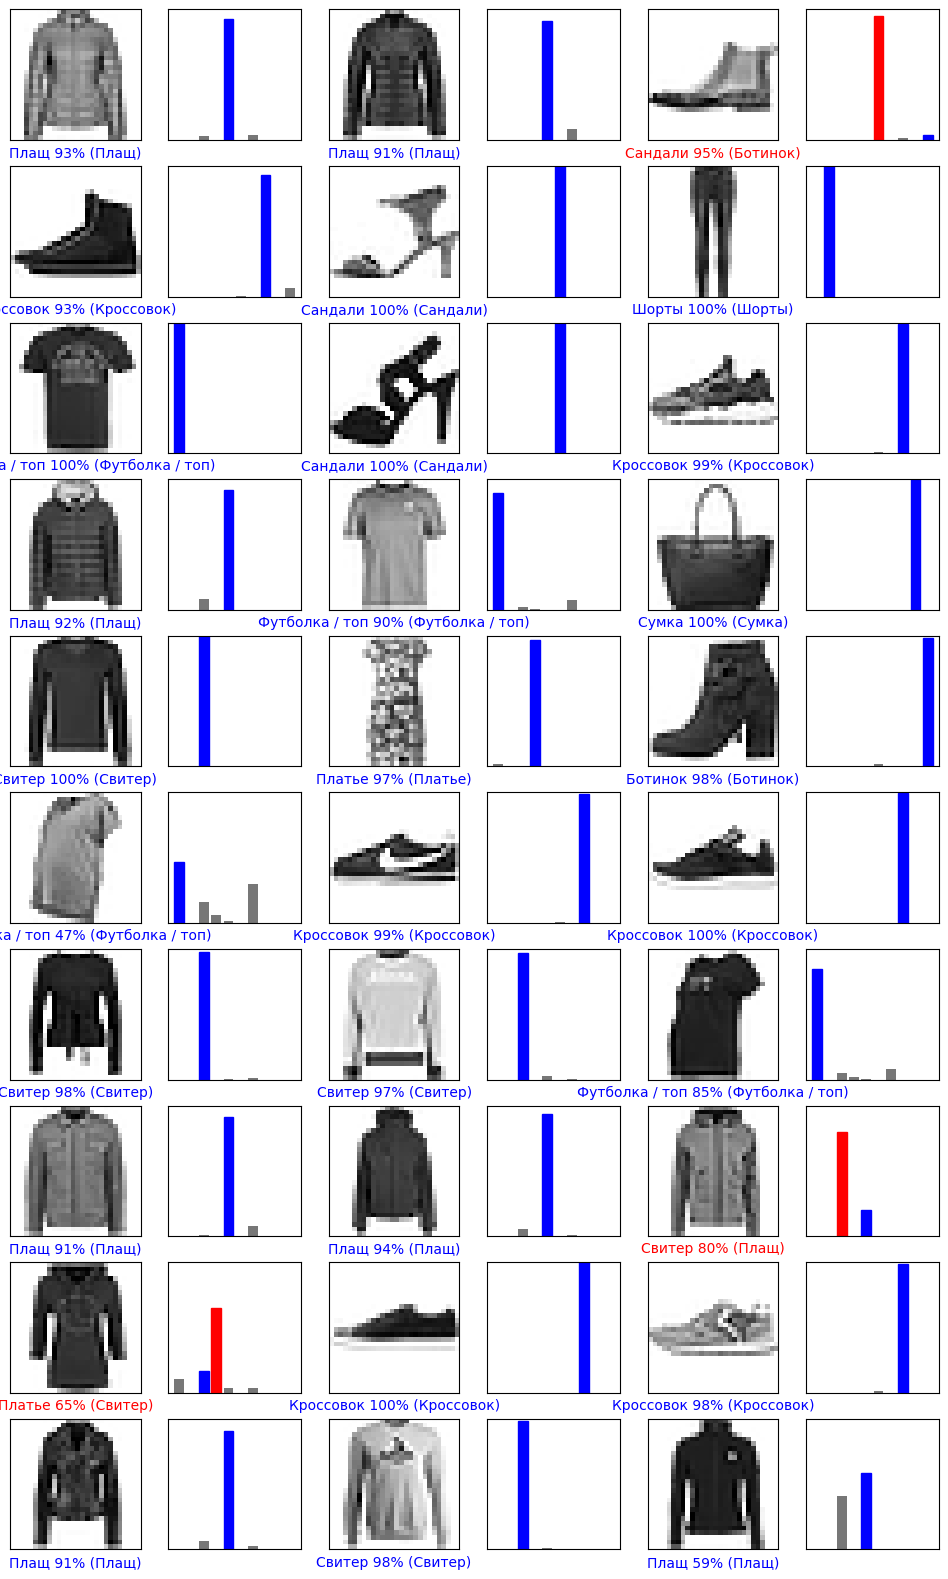

In [ ]:
num_rows = 10
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i + 1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i + 2)
  plot_value_array(i, predictions, test_labels)

In [ ]:
#Воспользуемся обученой моделью, чтобы предсказать метку для единственного изображения:

In [ ]:
img = test_images[0]
print(img.shape)

(28, 28, 1)


In [ ]:
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [ ]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[3.2146763e-05 8.9023524e-07 3.0834787e-02 9.4989136e-06 9.3055332e-01
  1.7466043e-09 3.8567640e-02 6.9974928e-09 1.6117926e-06 3.6161674e-09]]


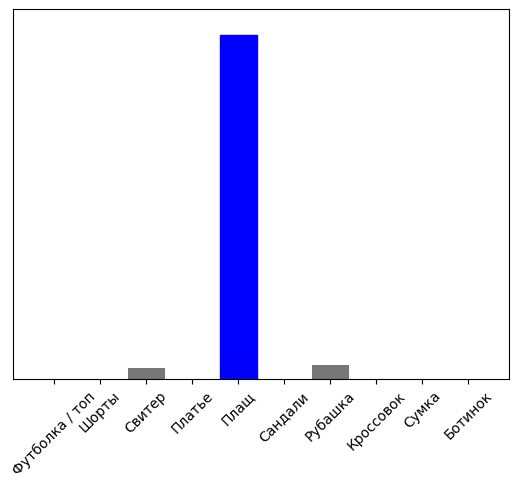

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

4

In [ ]:
#Модель предсказала метку 4

In [ ]:
# попробуем изменить эпоху, при увеличении количества эпох до 10, точность повысилась на 0,01, поэтому оставит 5 эпох
#для уменьшения времени расчетов

In [ ]:
# изменение количества нейронов в скрытом слое, при низком значении 20 - точность модели
#значительно снизилась, при увеличении до  512 точность улучшилась,
#но несущественно

In [ ]:
# добавление дополнительных слоев между flatten-слоем и конечным dense-слоем несущественно влияет на проноз
